# Rohingya Data Analysis

## Importing library and data

In [1]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing data
df = pd.read_csv('C:\\Users\\Rizal Aji Santoso\\Documents\\1. P (Project)\\data_project\\Kaggle_Rohingya Survey\\rohingya.csv',delimiter=';')
df.head()

,Row_ID,Sex,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",...,"If the Myanmar government recognizes the rights of Rohingya in the next two years, will you return to Myanmar?",Do you think that repatriation to Myanmar will happen in the next two years?,Do you personally know any Rohingya who left Bangladesh in the last six months?,Where did they go?,Have you thought about leaving to go to another country other than Myanmar and Bangladesh?,How scared are you to leave for another country?,Where do you think you will be in six months from now?,"If you could choose any country in the world, other than Myanmar, where would you go?",Where do you think the majority of Rohingya would choose to go if they could choose freely (apart from Myanmar)?,How do you feel about the future?
0,11584,Female,Unsatisfied,Satisfied,Yes,Unsatisfied,Unsatisfied,Satisfied,Yes,Very satisfied,...,Yes,No,Yes,Malaysia,Yes,very scared,Can't imagine/I am not sure where I will be,Canada,USA,positive
1,11585,Female,Unsatisfied,Satisfied,Yes,Neither satisfied nor unsatisfied,Satisfied,Unsatisfied,Yes,Very satisfied,...,Yes,No,No,NaN,No,very scared,Can't imagine/I am not sure where I will be,Saudi Arabia,Canada,NaN
2,11586,Female,Satisfied,Unsatisfied,Yes,Unsatisfied,Satisfied,Very satisfied,Yes,Very satisfied,...,Yes,No,Yes,Malaysia,No,very scared,Can't imagine/I am not sure where I will be,Australia,Canada,positive
3,11587,Female,Unsatisfied,Neither satisfied nor unsatisfied,Yes,Unsatisfied,Unsatisfied,Satisfied,Yes,Very satisfied,...,Yes,No,No,NaN,Yes,very scared,"Here, in the camp",Pakistan,Australia,positive
4,11590,Female,Satisfied,Satisfied,Yes,Unsatisfied,Unsatisfied,Satisfied,Yes,Very unsatisfied,...,Yes,No,No,NaN,No,very scared,Can't imagine/I am not sure where I will be,I don't want to go anywhere else.,I don't know about the majority,neither positive nor negative


## Assessing Data & Cleaning Data

In [3]:
#Data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 71 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   Row_ID                                                                                                                               1277 non-null   int64  
 1   Sex                                                                                                                                  1277 non-null   object 
 2   How satisfied are you with the amount of space allocated to you and your family in the camp?                                         1277 non-null   object 
 3   How satisfied are you with the level of hygiene and sanitation in the camp?   

In [4]:
df.describe(exclude='number').T

,count,unique,top,freq
Sex,1277,2,Female,717
How satisfied are you with the amount of space allocated to you and your family in the camp?,1277,4,Unsatisfied,642
How satisfied are you with the level of hygiene and sanitation in the camp?,1277,5,Satisfied,951
"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",1277,2,Yes,1244
How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,1277,5,Unsatisfied,953
...,...,...,...,...
How scared are you to leave for another country?,1277,5,very scared,667
Where do you think you will be in six months from now?,1277,11,"Here, in the camp",762
"If you could choose any country in the world, other than Myanmar, where would you go?",1277,48,Saudi Arabia,307
Where do you think the majority of Rohingya would choose to go if they could choose freely (apart from Myanmar)?,1277,41,Saudi Arabia,342


In [5]:
# Drop null value in column with less than 20 null values.
df_nonull = df.dropna(subset=['Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?',
                              'How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?',
                              'Other than family, who do you go to when you have a problem?',
                              'How much do you trust the Majhis?',
                              'How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?',
                              'Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?',
                              'Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?',
                              'Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?',
                              'Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?',
                              'Do you personally know any Rohingya who left Bangladesh in the last six months?',
                              'How do you feel about the future?'
                              ])

In [6]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 18 to 1276
Data columns (total 71 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   Row_ID                                                                                                                               1254 non-null   int64  
 1   Sex                                                                                                                                  1254 non-null   object 
 2   How satisfied are you with the amount of space allocated to you and your family in the camp?                                         1254 non-null   object 
 3   How satisfied are you with the level of hygiene and sanitation in the camp?  

In [7]:
# Sorting column with the most null value
df_groupnull = df_nonull.isna().sum().reset_index()
df_groupnull = df_groupnull.sort_values(0, ascending=False)
df_groupnull = df_groupnull.rename(columns={0: 'null_counts'})
df_groupnull = df_groupnull[(df_groupnull['null_counts'] > 0)]
df_groupnull

,index,null_counts
32,In what countries are they now?.1,1250
48,Have you ever seen any Rohingya in the camp us...,1248
24,Do you personally know any Rohingya family who...,1241
64,Where did they go?,1240
46,Have you ever seen any Rohingya in the camp u...,1232
40,How many cigarettes a day on average?,1008
41,Did you also smoke before coming to Bangladesh?,1008
53,Where does sexual harassment happen the most?,911
30,In what countries are they now?,579
44,Did you also chew before coming to Bangladesh?,533


C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2735039662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_groupnull,x='index',y='null_counts',palette='rainbow')


Text(0, 0.5, 'Missing Value')

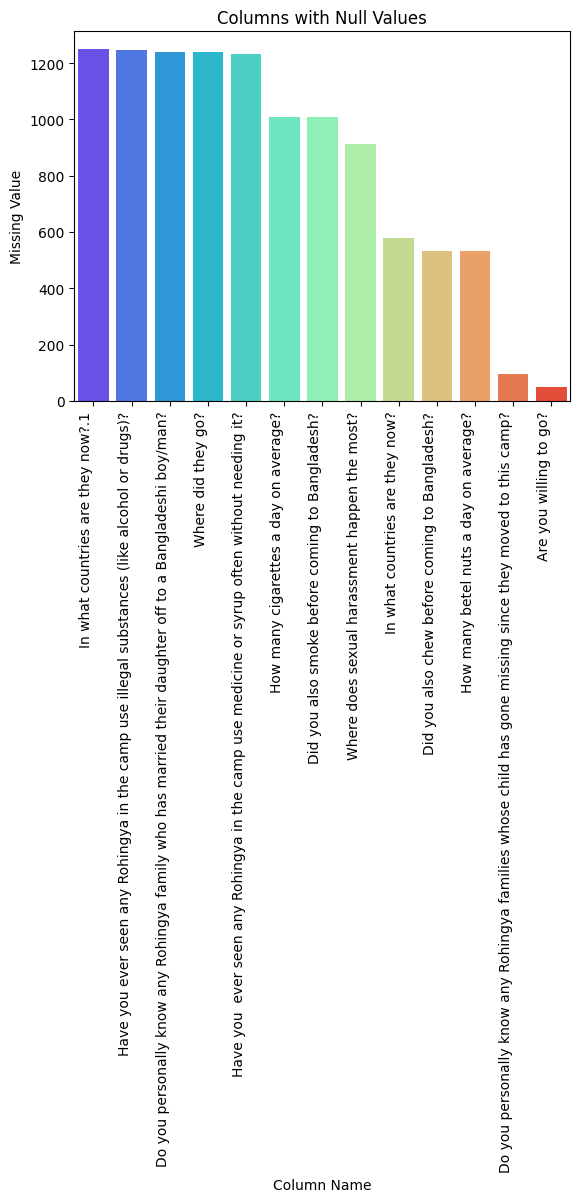

In [8]:
# Visualizing column with null value (sorted by highest null)
sns.barplot(data=df_groupnull,x='index',y='null_counts',palette='rainbow')
plt.xticks(rotation= 90, ha='right')
plt.title('Columns with Null Values')
plt.xlabel('Column Name')
plt.ylabel('Missing Value')

In [9]:
#Duplicate value
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row_ID,1277.0,12357.459671,410.612375,11584.0,12021.0,12378.0,12711.0,13041.0
How many cigarettes a day on average?,252.0,9.154762,5.413192,2.0,5.0,8.0,10.0,30.0
How many betel nuts a day on average?,737.0,7.944369,4.689941,2.0,5.0,5.0,10.0,30.0


### Identifying Outlier

array([[<Axes: title={'center': 'Row_ID'}>,
        <Axes: title={'center': 'How many cigarettes a day on average?'}>],
       [<Axes: title={'center': 'How many betel nuts a day on average?'}>,
        <Axes: >]], dtype=object)

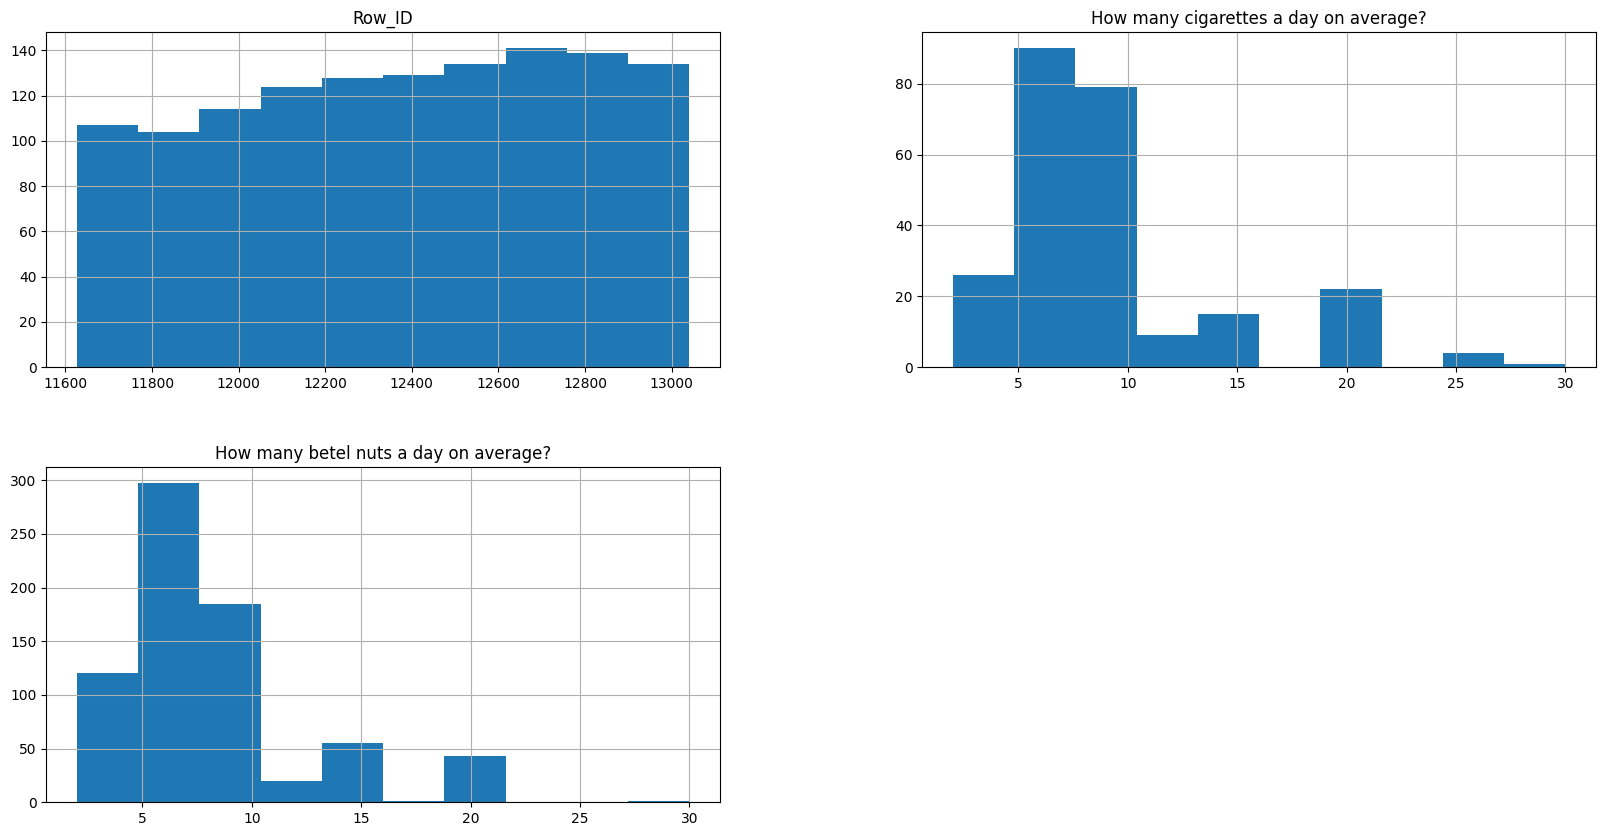

In [11]:
df_nonull.hist(figsize=(20,10))

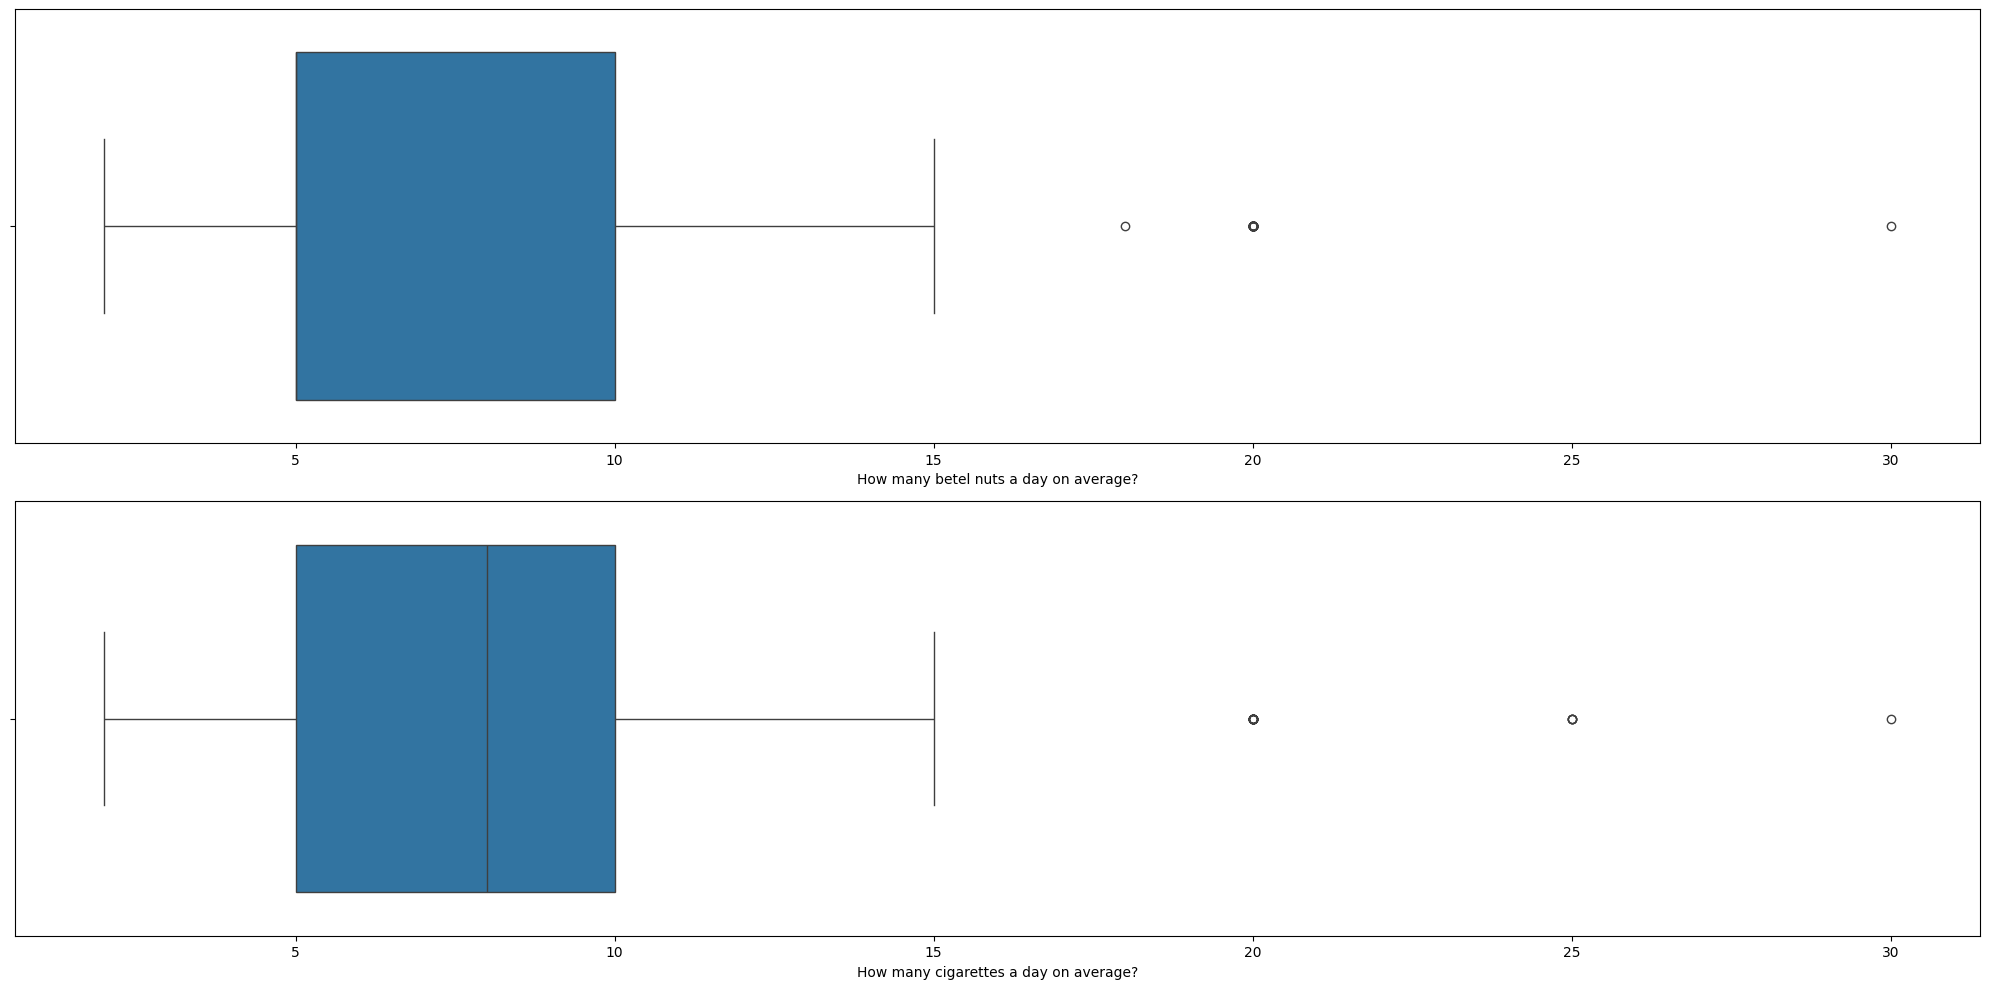

In [12]:
# Using Boxplot
fig, axes = plt.subplots(2,1,figsize=(20,10))
sns.boxplot(ax=axes[0],x=df_nonull['How many betel nuts a day on average?'])
sns.boxplot(ax=axes[1],x=df_nonull['How many cigarettes a day on average?'])
plt.tight_layout()

In [13]:
#Finding out outlier value in betel nuts and cigarettes average consumption
#Betel Nuts
q3_betel = df_nonull['How many betel nuts a day on average?'].quantile(0.75)
q1_betel = df_nonull['How many betel nuts a day on average?'].quantile(0.25)
t_betel = q3_betel - q1_betel

betel_above = q3_betel+3*t_betel
betel_below = q1_betel-3*t_betel

#Cigarettes
q3_cigar = df_nonull['How many cigarettes a day on average?'].quantile(0.75)
q1_cigar = df_nonull['How many cigarettes a day on average?'].quantile(0.25)
t_cigar = q3_cigar - q1_cigar

cigar_above = q3_cigar+3*t_cigar
cigar_below = q1_cigar-3*t_cigar

print('Betel upper limit :',betel_above)
print('Betel lower limit :',betel_below)
print('Cigar upper limit :',cigar_above)
print('Cigar lower limit :',cigar_below)


Betel upper limit : 25.0
Betel lower limit : -10.0
Cigar upper limit : 25.0
Cigar lower limit : -10.0


In [14]:
#Removing outlier
df_noout = df_nonull[(df_nonull['How many betel nuts a day on average?'] >= cigar_below) & 
                     (df_nonull['How many betel nuts a day on average?'] <= cigar_above)]
df_noout = df_nonull[(df_nonull['How many cigarettes a day on average?'] >= cigar_below) & 
                     (df_nonull['How many cigarettes a day on average?'] <= cigar_above)]
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 39 to 1272
Data columns (total 71 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   Row_ID                                                                                                                               245 non-null    int64  
 1   Sex                                                                                                                                  245 non-null    object 
 2   How satisfied are you with the amount of space allocated to you and your family in the camp?                                         245 non-null    object 
 3   How satisfied are you with the level of hygiene and sanitation in the camp?   

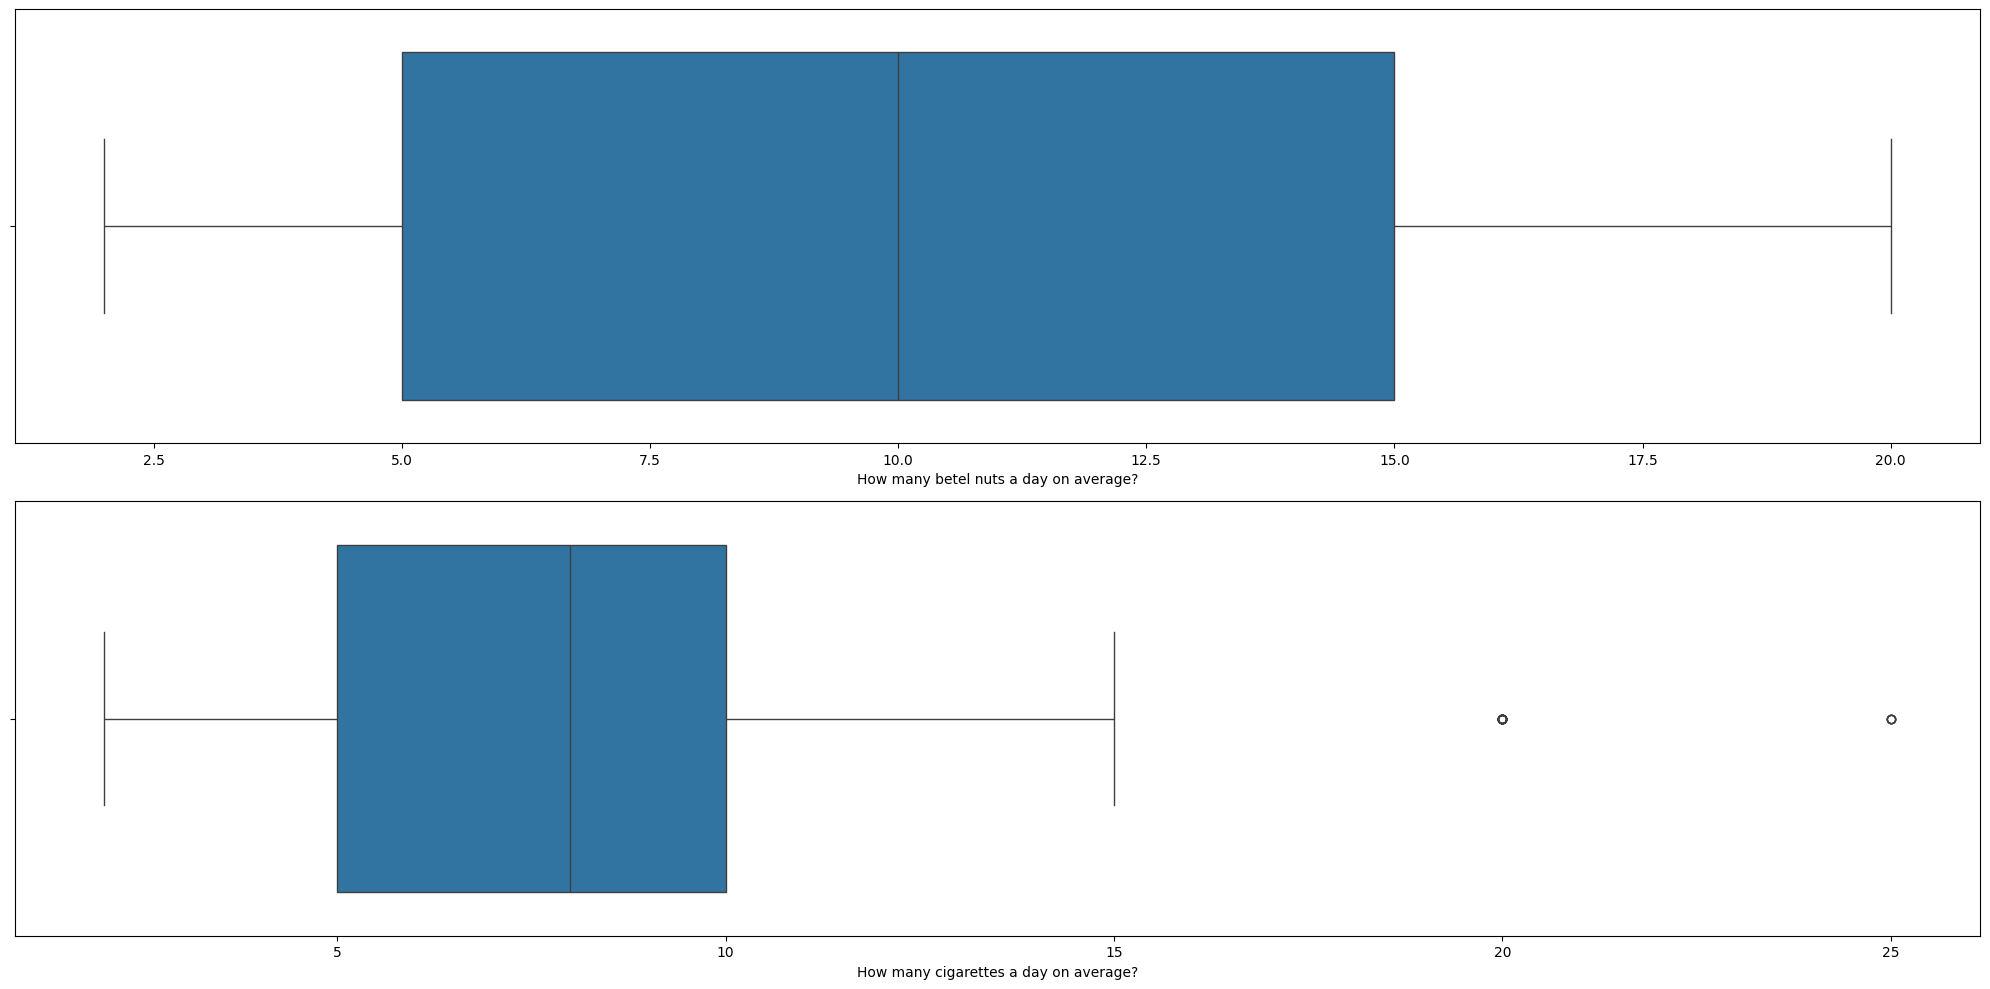

In [15]:
# Using Boxplot
fig, axes = plt.subplots(2,1,figsize=(20,10))
sns.boxplot(ax=axes[0],x=df_noout['How many betel nuts a day on average?'])
sns.boxplot(ax=axes[1],x=df_noout['How many cigarettes a day on average?'])
plt.tight_layout()

# EDA

### Grouping Respondent by Gender

In [16]:
group_gender = df_nonull.groupby('Sex').agg({
'Row_ID':'count'
}).reset_index()
group_gender

,Sex,Row_ID
0,Female,702
1,Male,552


Text(0.5, 1.0, 'Respondent by Gender')

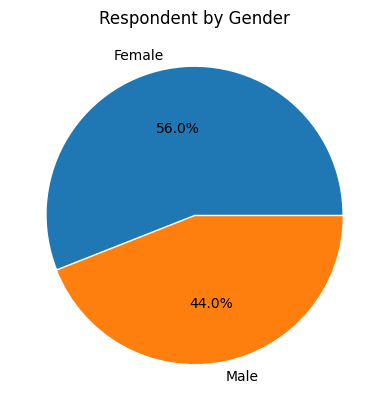

In [17]:
explode = (0.01, 0)
plt.pie(x=group_gender['Row_ID'],labels=group_gender['Sex'],autopct='%1.1f%%',explode=explode)
plt.title('Respondent by Gender')

## How Satisfied are the Rohingyan in the camp? 

C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\3608398879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,0],x=df_nonull['How satisfied are you with the amount of space allocated to you and your family in the camp?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\3608398879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1,0],x=df_nonull['How satisfied are you with the level of hygiene and sanitation in the camp?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\3608398879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

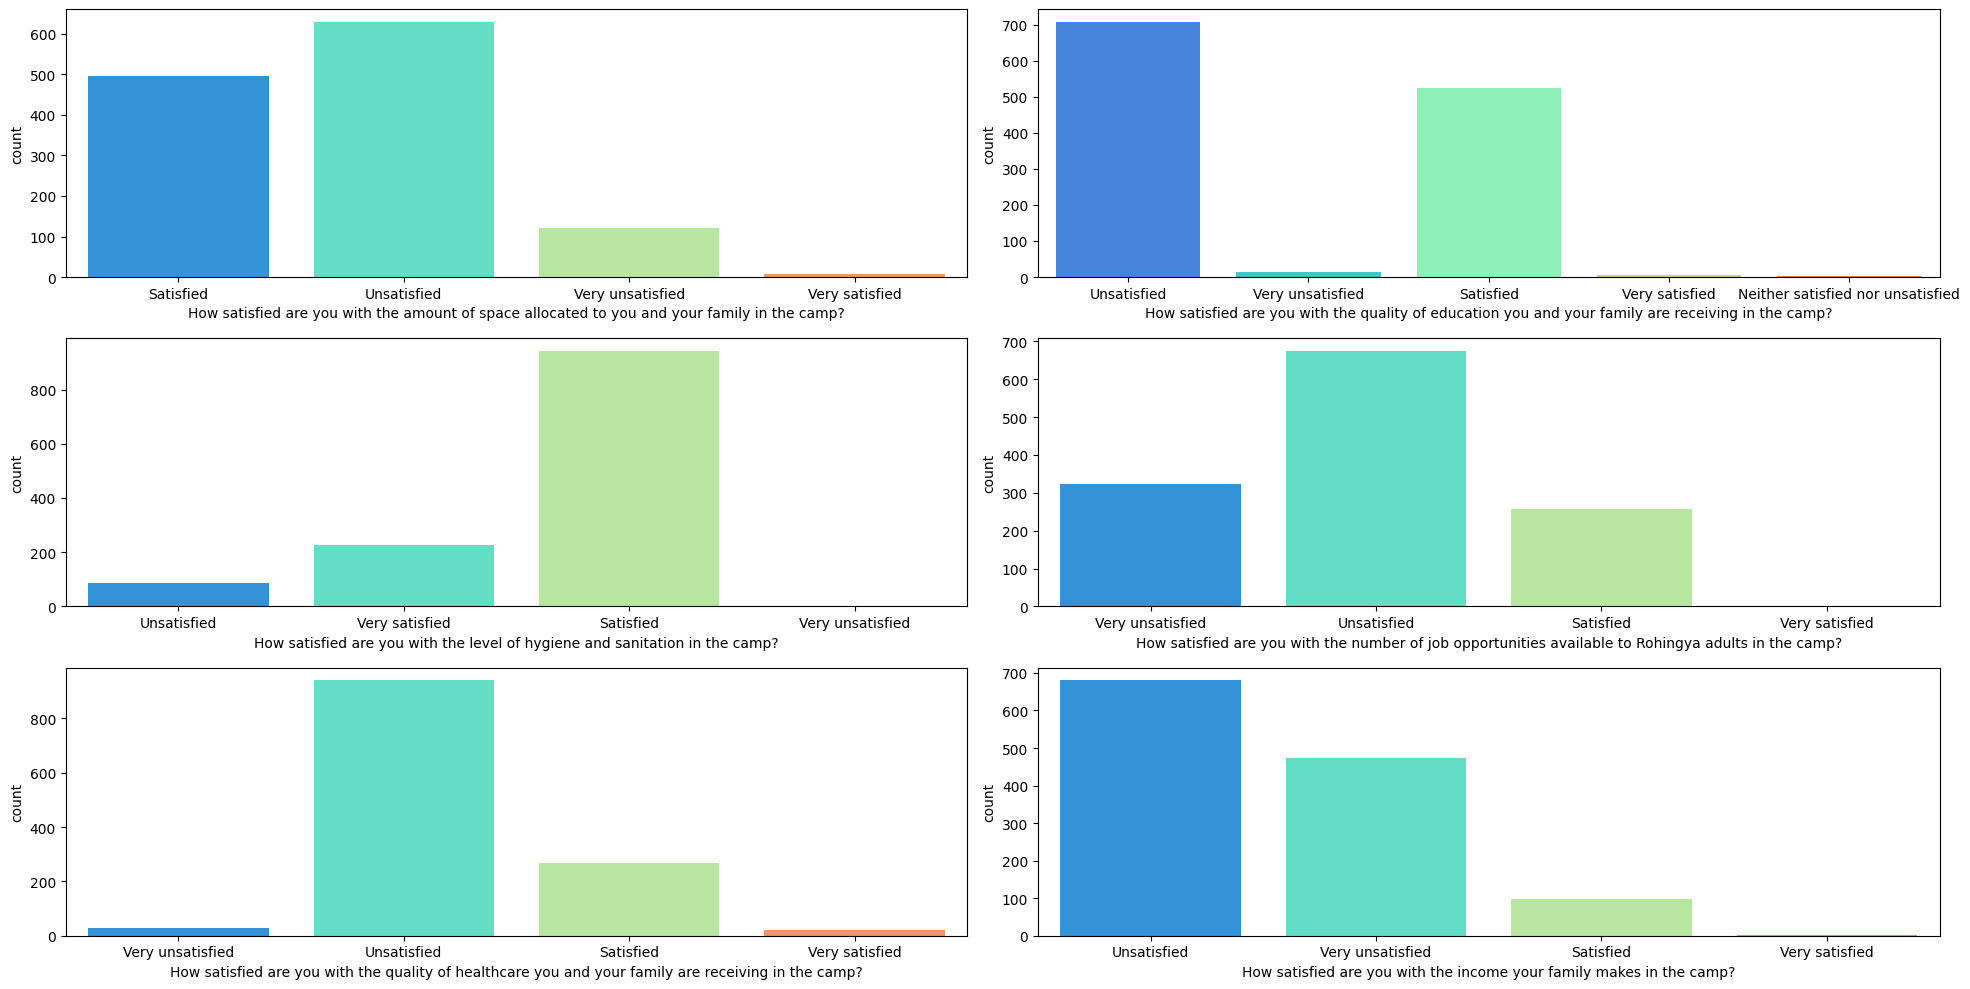

In [18]:
#How satisfied are you with the amount of space allocated to you and your family in the camp
fig,axes = plt.subplots(3,2,figsize=(20,10))
sns.countplot(ax=axes[0,0],x=df_nonull['How satisfied are you with the amount of space allocated to you and your family in the camp?'],palette='rainbow')
sns.countplot(ax=axes[1,0],x=df_nonull['How satisfied are you with the level of hygiene and sanitation in the camp?'],palette='rainbow')
sns.countplot(ax=axes[2,0],x=df_nonull['How satisfied are you with the quality of healthcare you and your family are receiving in the camp?'],palette='rainbow')
sns.countplot(ax=axes[0,1],x=df_nonull['How satisfied are you with the quality of education you and your family are receiving in the camp?'],palette='rainbow')
sns.countplot(ax=axes[1,1],x=df_nonull['How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?'],palette='rainbow')
sns.countplot(ax=axes[2,1],x=df_nonull['How satisfied are you with the income your family makes in the camp?'],palette='rainbow')
plt.tight_layout()

### Result :
1. Most of the rohingyan are satisfied about the hygience and sanitation.
2. Most of the rohingyan are unsatisfied with the healthcare, job opportunities, income and education in the camp.
3. There is mix result in the amount of space in the camp

## Cigarettes and Betel Nuts Consumption

<Axes: xlabel='Sex', ylabel='Number of People'>

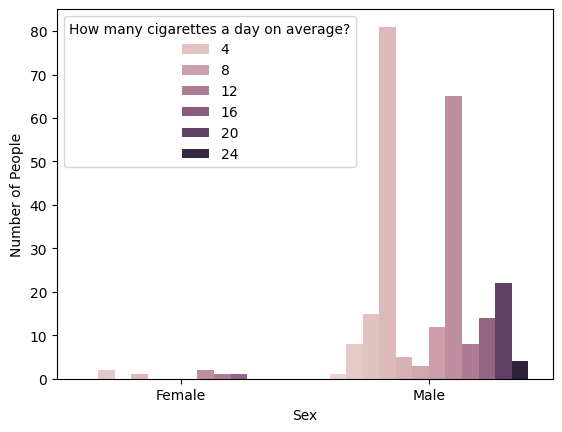

In [19]:
cig_cons = df_noout.groupby(['Sex','How many betel nuts a day on average?']).agg({
    'Sex':'count'
})
cig_cons = cig_cons.rename(columns={'Sex':'Number of People'}).reset_index()



cig_cons = df_noout.groupby(['Sex','How many cigarettes a day on average?']).agg({
    'Sex':'count'
})
cig_cons = cig_cons.rename(columns={'Sex':'Number of People'}).reset_index()

sns.barplot(data=cig_cons, x='Sex', y='Number of People', hue='How many cigarettes a day on average?')

## Educational Aspect

C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2842748823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,0],x=df_nonull['How satisfied are you with the quality of education you and your family are receiving in the camp?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2842748823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1,0],x=df_nonull['Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2842748823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is de

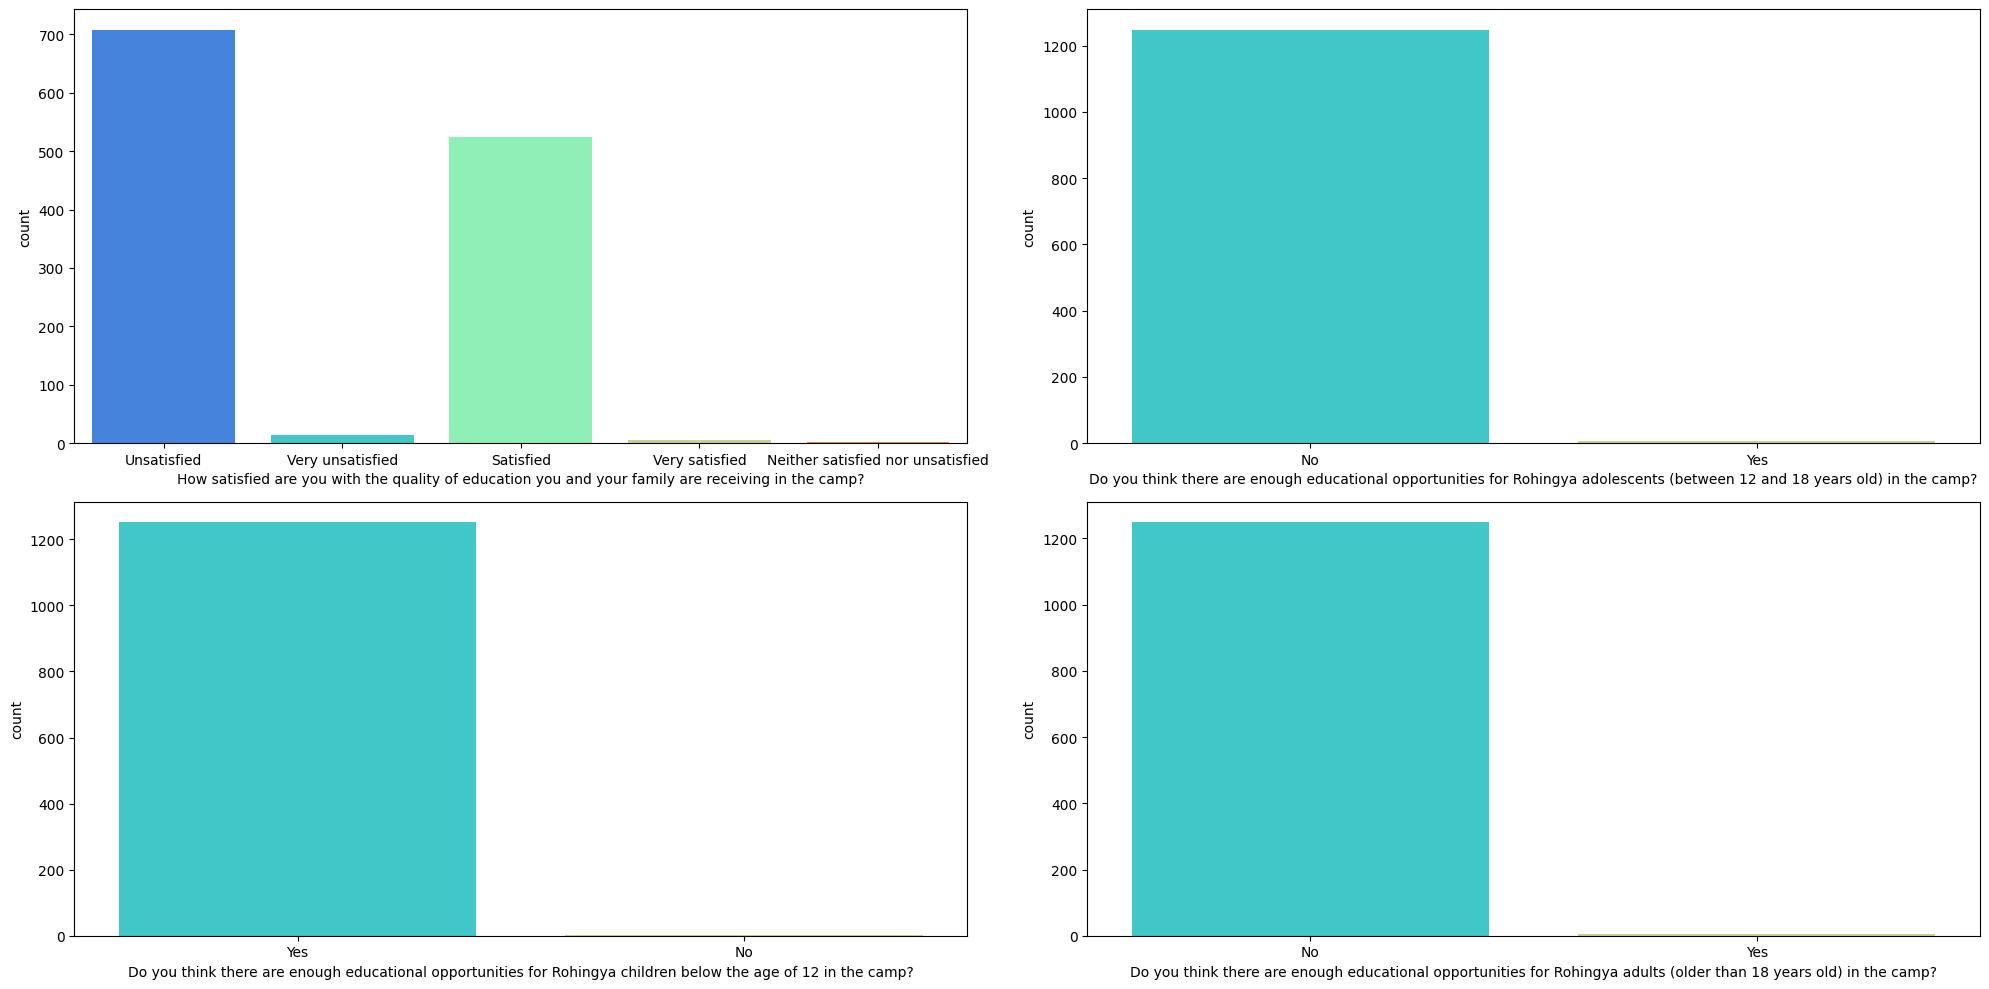

In [20]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
sns.countplot(ax=axes[0,0],x=df_nonull['How satisfied are you with the quality of education you and your family are receiving in the camp?'],palette='rainbow')
sns.countplot(ax=axes[1,0],x=df_nonull['Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?'],palette='rainbow')
sns.countplot(ax=axes[0,1],x=df_nonull['Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?'],palette='rainbow')
sns.countplot(ax=axes[1,1],x=df_nonull['Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?'],palette='rainbow')
plt.tight_layout()

## Relationship with NGO

C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2926406370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0],x=df_nonull['How much do you trust the NGOs in the camp?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2926406370.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Add rotation to x-axis labels
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\2926406370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1],x=df_nonull['How comfortable 

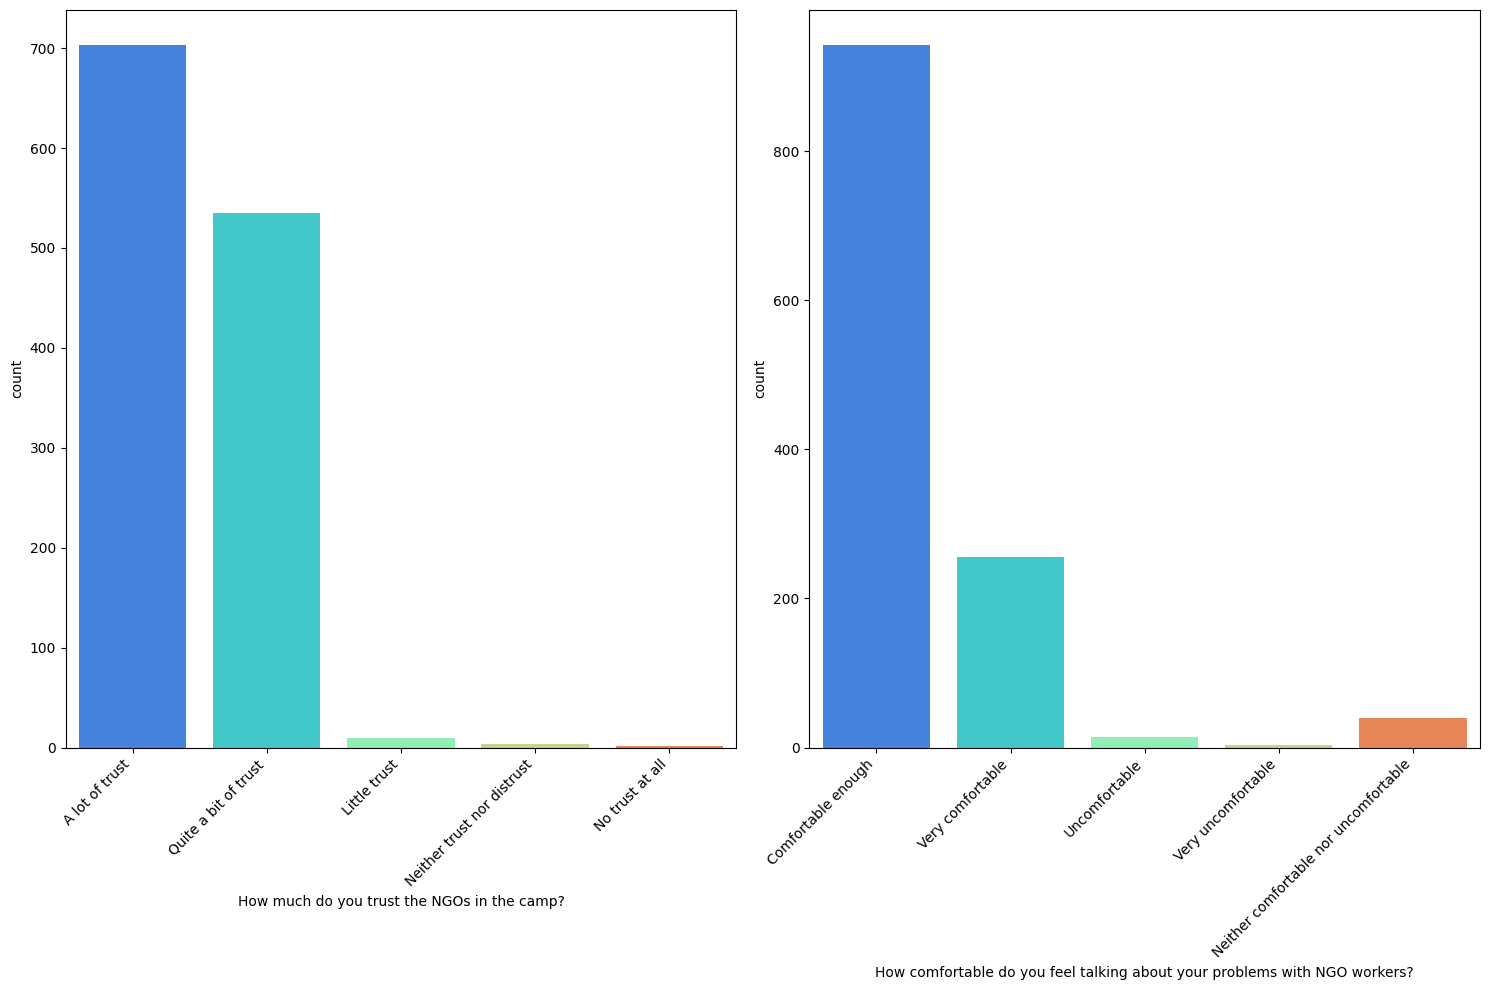

In [21]:
fig,axes = plt.subplots(1,2,figsize=(15,10))
sns.countplot(ax=axes[0],x=df_nonull['How much do you trust the NGOs in the camp?'],palette='rainbow')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Add rotation to x-axis labels

sns.countplot(ax=axes[1],x=df_nonull['How comfortable do you feel talking about your problems with NGO workers?'],palette='rainbow')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')  # Add rotation to x-axis labels

plt.tight_layout()

## Future Plans

In [46]:
country = df_nonull.groupby('If you could choose any country in the world, other than Myanmar, where would you go?').agg({
    'Row_ID':'count'
}).reset_index()

country = country.rename(columns={'Row_ID':'Counts'})
country = country.sort_values('Counts',ascending = False)
country

,"If you could choose any country in the world, other than Myanmar, where would you go?",Counts
34,Saudi Arabia,303
45,USA,156
14,Canada,151
23,I don't want to go anywhere else.,147
1,Australia,76
35,"Saudi Arabia, Turkey",67
25,Malaysia,63
40,Turkey,51
2,"Australia, Canada",45
21,"Canada, USA",36


C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\3669637695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0],x=df_nonull['How do you feel about the future?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\3669637695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1],x=df_nonull['Where do you think you will be in six months from now?'],palette='rainbow')
C:\Users\Rizal Aji Santoso\AppData\Local\Temp\ipykernel_7188\3669637695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

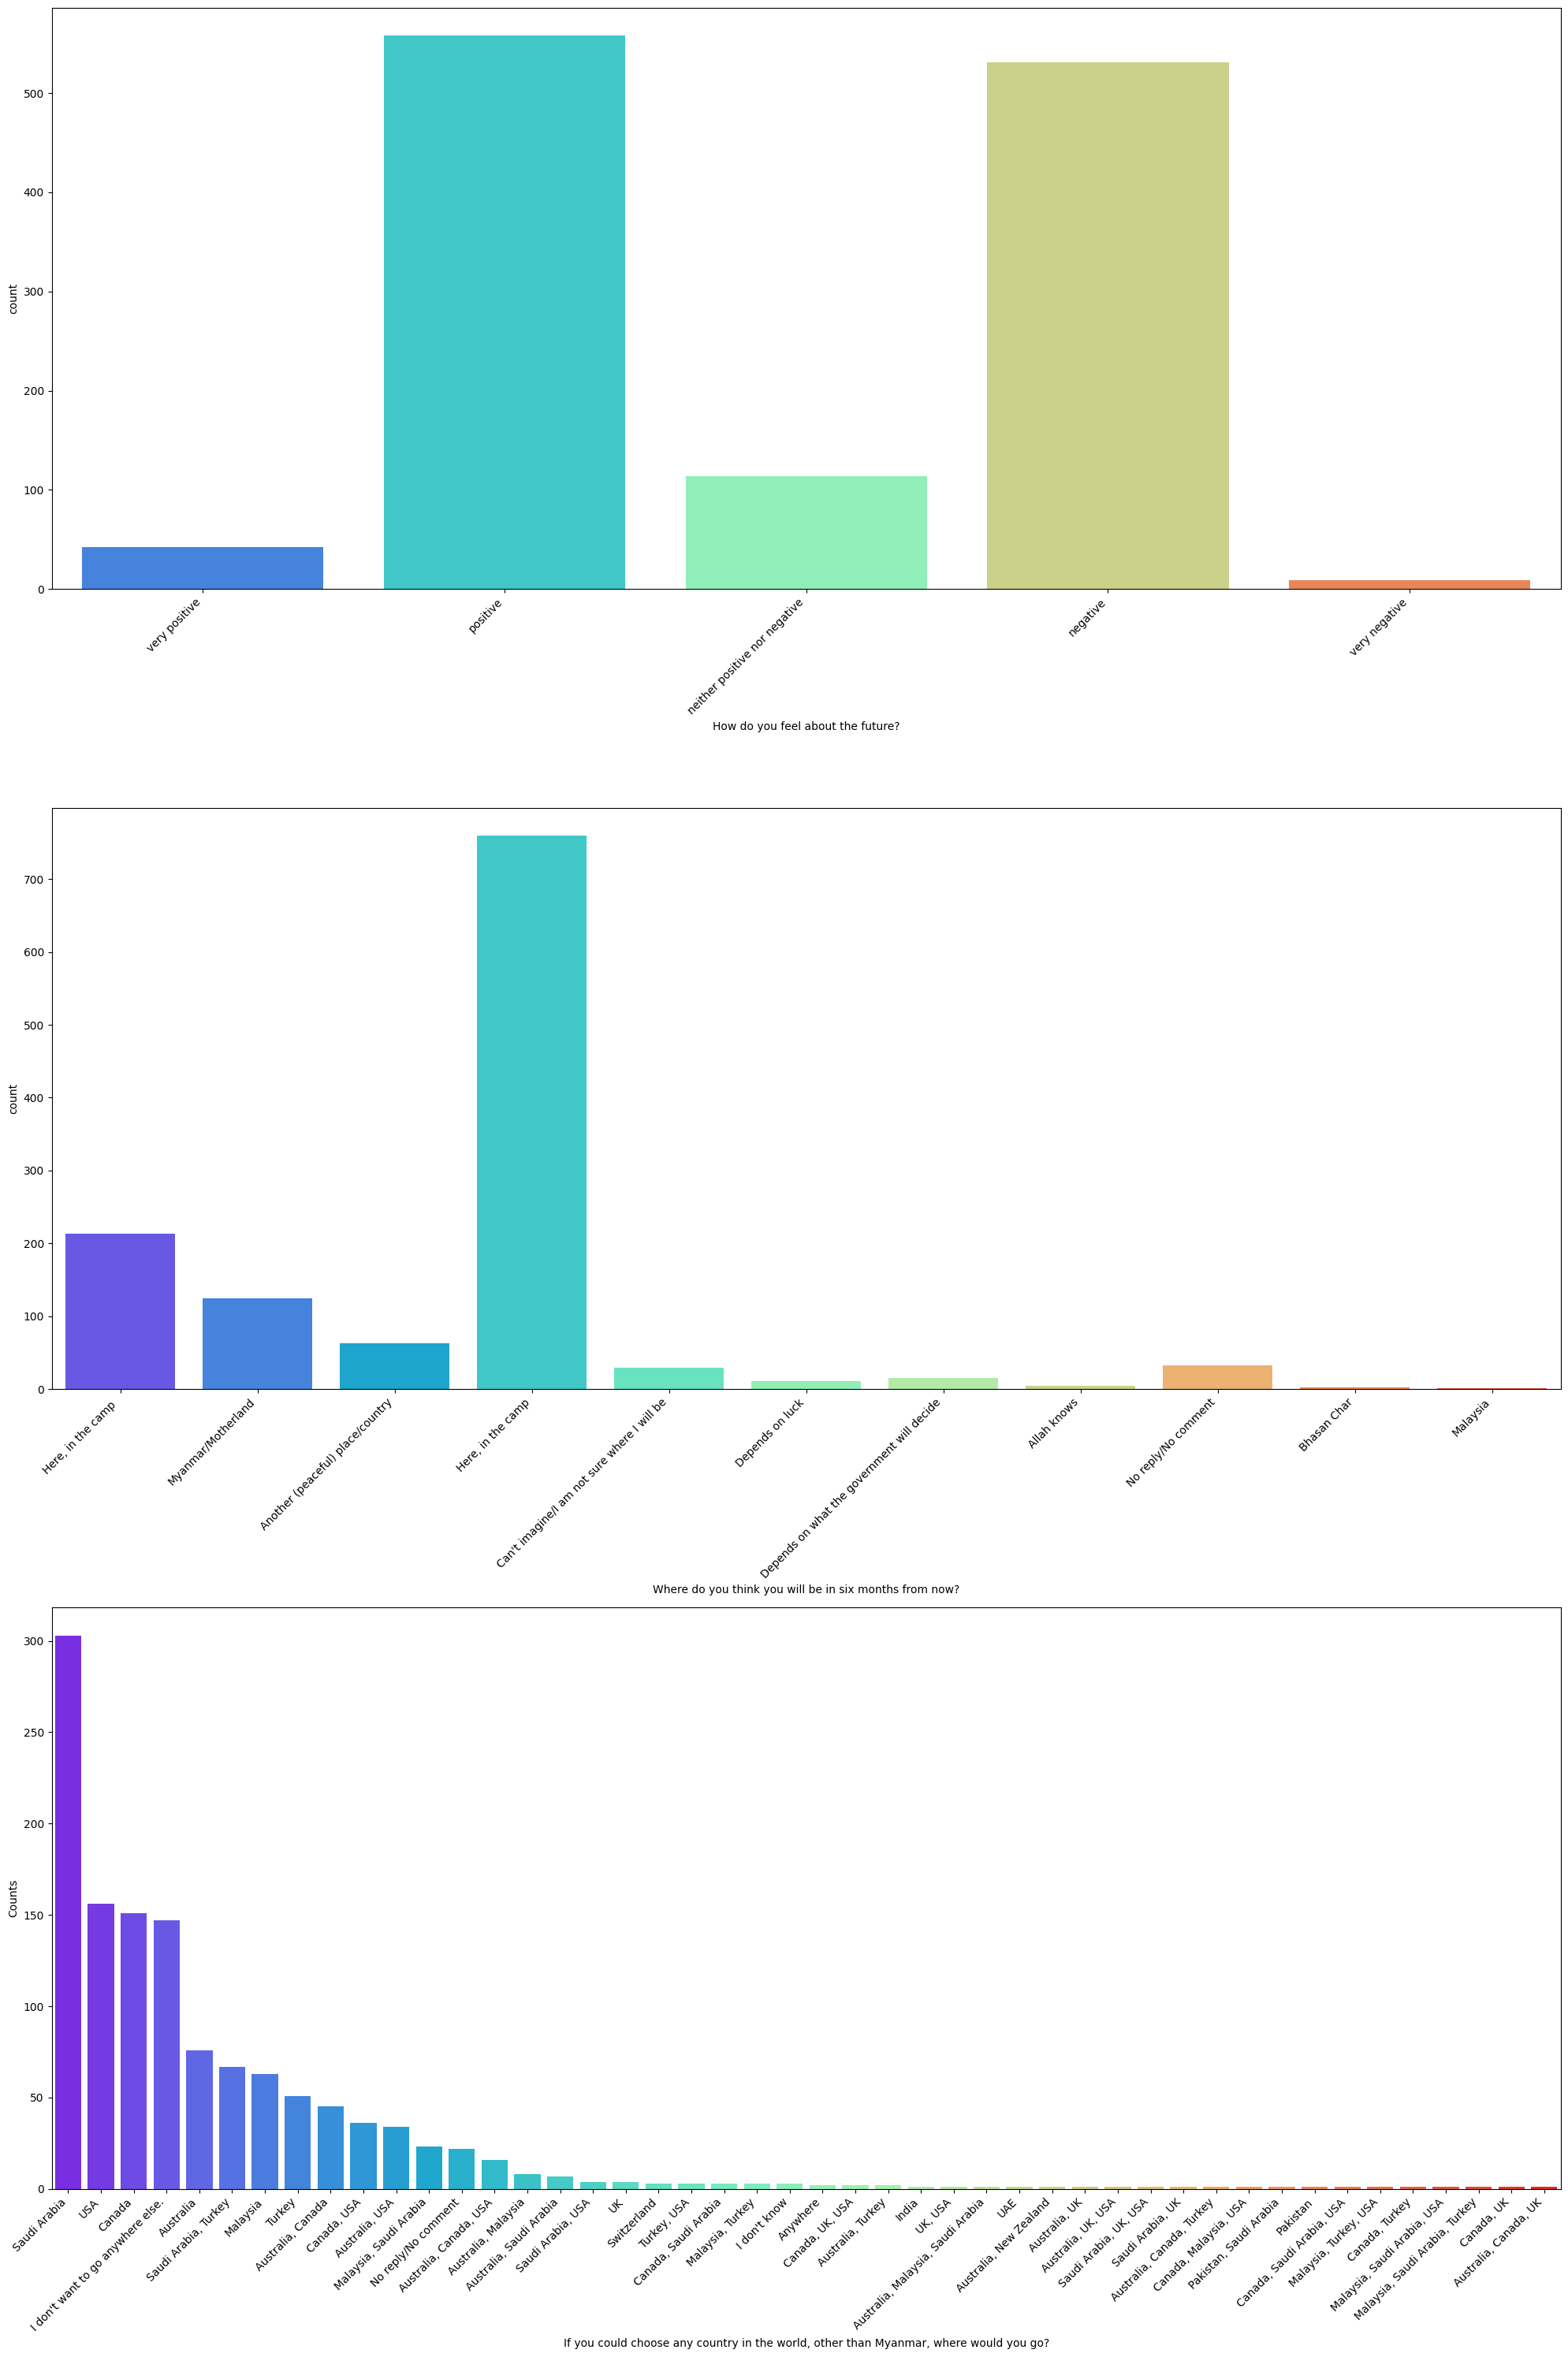

In [49]:


fig, axes = plt.subplots(3,1,figsize=(20,30))
sns.countplot(ax=axes[0],x=df_nonull['How do you feel about the future?'],palette='rainbow')
sns.countplot(ax=axes[1],x=df_nonull['Where do you think you will be in six months from now?'],palette='rainbow')
sns.barplot(ax=axes[2],x=country['If you could choose any country in the world, other than Myanmar, where would you go?'],y=country['Counts'],orient='v',palette='rainbow')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [51]:
import session_info
session_info.show()